# Thực hiện quá trình dự báo trên mô hình ARIMA

## Thêm thư viện

In [1]:
import pandas as pd
import warnings
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from pmdarima.arima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')


## Nạp dữ liệu từ file csv

In [2]:
df_train = pd.read_csv("../../../Dataset/bitcoin_train_9_1.csv", parse_dates=True,
                       index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_train.index

df_close_train = df_train['Open'].values.copy().reshape(-1, 1)
df_train.head()


,Open
Date,
2020-06-01,9.4545
2020-06-02,10.1907
2020-06-03,9.5270
2020-06-04,9.6672
2020-06-05,9.7940


In [3]:
df_test = pd.read_csv("../../../Dataset/bitcoin_test_9_1.csv", parse_dates=True,
                      index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_test.index

df_close_test = df_test['Open'].values.copy().reshape(-1, 1)
df_test.head()


,Open
Date,
2022-03-21,41.282
2022-03-22,41.022
2022-03-23,42.373
2022-03-24,42.911
2022-03-25,44.013


# Vẽ đồ thị

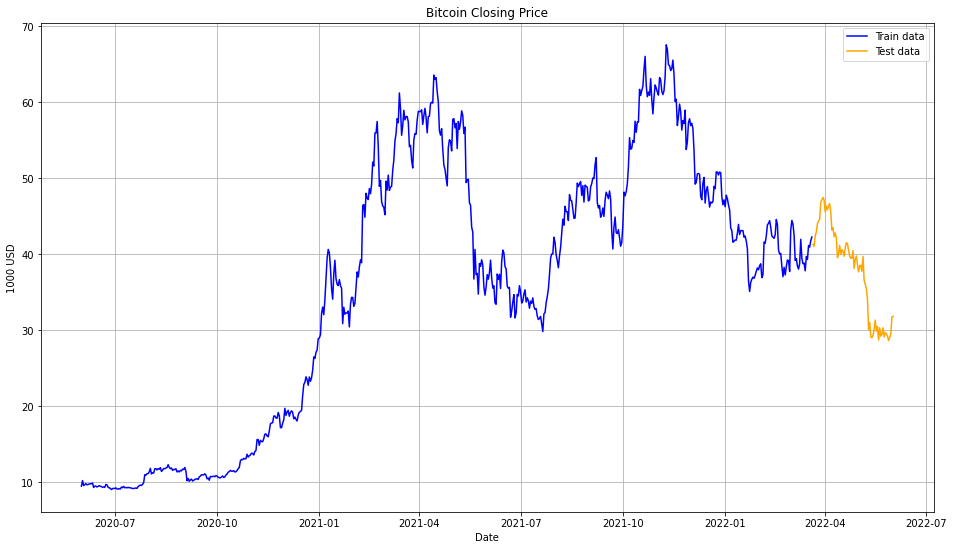

In [4]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Bitcoin Closing Price")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_train['Open'], 'blue', label='Train data')
plt.plot(df_test['Open'], 'orange', label='Test data')
plt.legend()


# Tách dữ liệu thành tập train và test

In [5]:
train_data, test_data = df_train, df_test
index_test = column_or_1d(df_test.index)
print(train_data.shape)
print(test_data.shape)


(658, 1)
(73, 1)


In [6]:
train_data

,Open
Date,
2020-06-01,9.4545
2020-06-02,10.1907
2020-06-03,9.5270
2020-06-04,9.6672
2020-06-05,9.7940
...,...
2022-03-16,39.2825
2022-03-17,41.1187
2022-03-18,40.9146


<h1>Xây dựng mô hình ARIMA để dự đoán giá Bitcoin theo chuỗi thời gian


In [7]:
warnings.filterwarnings('ignore')


def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    return fit_model


In [8]:
fitted = arima_model(train_data)
fitted.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2433.831, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2435.020, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2434.998, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2432.523, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2436.961, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.210 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  658
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1215.262
Date:                Sun, 26 Jun 2022   AIC                           2432.523
Time:                        15:01:58   BIC                           2437.011
Sample:                             0   HQIC                          2434.263
                                - 658                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.3668      0.080     29.425      0.000       2.209       2.524
===================================================================================
Ljung-Box (L1) (Q):                   0.82   Jarque-Bera (JB):               298.67
Prob(Q):                              0.37   Prob(JB):                         0.00
Heteroskedasticity (H):              11.30   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1> Dự đoán trên tập test

In [9]:
pred = fitted.predict(len(test_data))
pred


array([42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241,
       42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241,
       42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241,
       42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241,
       42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241,
       42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241,
       42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241,
       42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241,
       42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241, 42.241,
       42.241])

# Vẽ đồ thị cho tập test và kết quả dự đoán


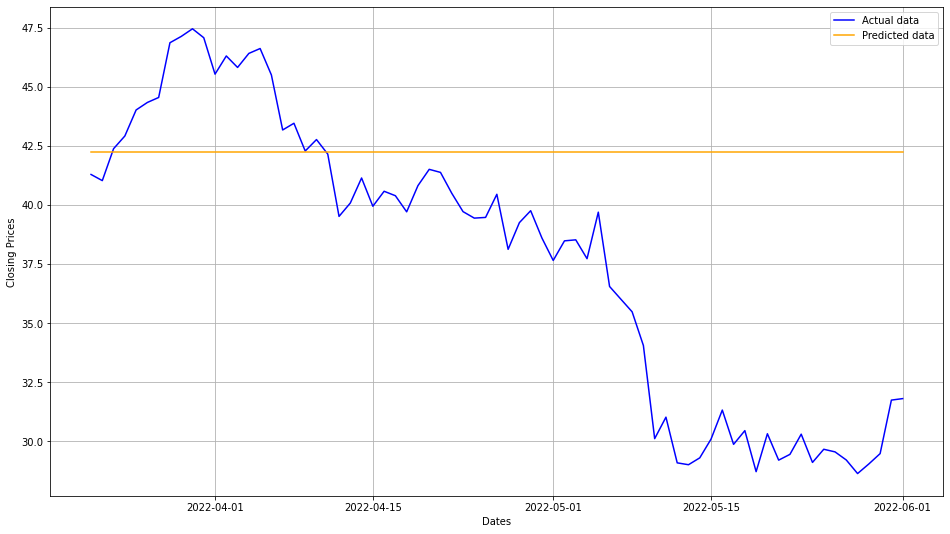

In [10]:
pred_series = pd.Series(pred, index=index_test)

plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data, 'blue', label='Actual data')
plt.plot(pred_series, 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [11]:
mape = mean_absolute_percentage_error(test_data.values, pred_series.values)
mse = mean_squared_error(test_data.values, pred_series.values)
rmse = np.sqrt(mse)
r2 = r2_score(test_data.values, pred_series.values)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2*100:.2f}%")

MAPE: 17.96%
RMSE: 7.52
R2: -53.52%


# Tạo một DataFrame là 'df_pred' để lưu kết quả dự đoán trên mô hình ARIMA

In [12]:
df_pred = pd.DataFrame(index=index_test)
df_pred['actual'] = test_data.values
df_pred['arima'] = pred_series.values
df_pred['error'] = df_pred['actual'] - df_pred['arima']
df_pred


,actual,arima,error
2022-03-21,41.2820,42.241,-0.9590
2022-03-22,41.0220,42.241,-1.2190
2022-03-23,42.3730,42.241,0.1320
2022-03-24,42.9110,42.241,0.6700
2022-03-25,44.0130,42.241,1.7720
...,...,...,...
2022-05-28,28.6201,42.241,-13.6209
2022-05-29,29.0271,42.241,-13.2139
2022-05-30,29.4652,42.241,-12.7758
2022-05-31,31.7302,42.241,-10.5108


# Tạo thêm một DataFrame để tiến hành dự đoán sai số trên mô hình SVR

In [13]:
df_svr = df_pred.copy()
df_svr = df_svr.drop(columns=['actual', 'arima'])
timestamp = pd.to_datetime(df_svr.index).astype(np.int64) / 10**9
df_svr['timestamp'] = timestamp
df_svr.tail()

,error,timestamp
2022-05-28,-13.6209,1.653696e+09
2022-05-29,-13.2139,1.653782e+09
2022-05-30,-12.7758,1.653869e+09
2022-05-31,-10.5108,1.653955e+09
2022-06-01,-10.4479,1.654042e+09


In [14]:
svr_x_sc = StandardScaler()
svr_y_sc = StandardScaler()

x = df_svr.iloc[:, -1].values
y = df_svr.iloc[:, 0].values

x_scaled = svr_x_sc.fit_transform(x.reshape(-1, 1))
y_scaled = svr_y_sc.fit_transform(y.reshape(-1, 1))

print(x_scaled.shape)
print(y_scaled.shape)

(73, 1)
(73, 1)


<h1>Vẽ đồ thị thể hiện sai số

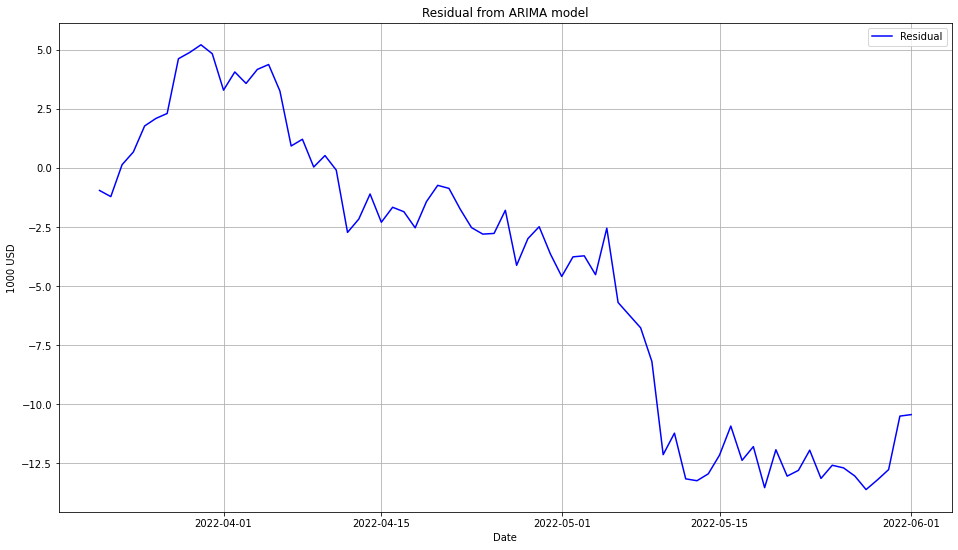

In [15]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Residual from ARIMA model")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_svr['error'], 'blue', label='Residual')
plt.legend()


## Hàm tạo hyperparameters

In [16]:
def para_range(minimum, maximum, step):
    para_list = np.arange(minimum, maximum, step)
    return para_list


def print_stats(hyperparams, stats):
    if(hyperparams[0] == 'poly'):
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}, degree={hyperparams[3]}')
    else:
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}')

    print(
        f"MSE={stats[0] :.2f} | RMSE={stats[1]:.2f}")


In [17]:
kernels = ['sigmoid', 'rbf', 'poly']
Cs = para_range(0.01, 0.2, 0.1)
gammas = para_range(0.1, 5, 0.1)
degrees = para_range(1, 6, 1)


## GridSearch để tìm hyperparameters phù hợp

In [18]:
warnings.filterwarnings('ignore')

stats_df = pd.DataFrame(
    columns=['kernel', 'C', 'gamma', 'degree',  'MSE', 'RMSE'])

# Sử dụng gird-seach để tìm hyperparameters phù hợp
for ker in kernels:
    # Nếu kernel == poly thì thực hiện chọn degree
    if(ker != 'poly'):
        for C in Cs:
            for gamma in gammas:
                rgs = SVR(kernel=ker, C=C, gamma=gamma, verbose=False)
                rgs.fit(x_scaled, y)
                pred = rgs.predict(x_scaled)

                # Đảo tỷ lệ thành giá trị thực
                inv_pred = svr_y_sc.inverse_transform(
                    column_or_1d(pred).reshape(-1, 1))
                inv_y = svr_y_sc.inverse_transform(
                    column_or_1d(y).reshape(-1, 1))

                # Đánh giá mô hình
                mse = mean_squared_error(inv_y, inv_pred)
                rmse = np.sqrt(mse)

                result = {'kernel': ker, 'C': C, 'gamma': gamma,
                          'degree': 0, 'MSE': mse, 'RMSE': rmse}

                hyperparam = [ker, C, gamma, 0]
                stats = [mse, rmse]
                stats_df = stats_df.append(result, ignore_index=True)
                print_stats(hyperparam, stats)
    else:
        for C in Cs:
            for gamma in gammas:
                for deg in degrees:
                    rgs = SVR(kernel=ker, C=C, gamma=gamma,
                              degree=deg, verbose=False)
                    rgs.fit(x_scaled, y)
                    pred = rgs.predict(x_scaled)

                    # Đảo tỷ lệ thành giá trị thực
                    inv_pred = svr_y_sc.inverse_transform(
                        column_or_1d(pred).reshape(-1, 1))
                    inv_y = svr_y_sc.inverse_transform(
                        column_or_1d(y).reshape(-1, 1))

                    # Đánh giá mô hình
                    mse = mean_squared_error(inv_y, inv_pred)
                    rmse = np.sqrt(mse)

                    hyperparam = [ker, C, gamma, deg]
                    stats = [mse, rmse]
                    result = {'kernel': ker, 'C': C, 'gamma': gamma, 'degree': deg,
                              'MSE': mse, 'RMSE': rmse}

                    stats_df = stats_df.append(result, ignore_index=True)

                    print_stats(hyperparam, stats)


SVR(kernel=sigmoid, C=0.01, gamma=0.1
MSE=1447.81 | RMSE=38.05
SVR(kernel=sigmoid, C=0.01, gamma=0.2
MSE=1421.79 | RMSE=37.71
SVR(kernel=sigmoid, C=0.01, gamma=0.30000000000000004
MSE=1398.57 | RMSE=37.40
SVR(kernel=sigmoid, C=0.01, gamma=0.4
MSE=1378.73 | RMSE=37.13
SVR(kernel=sigmoid, C=0.01, gamma=0.5
MSE=1361.12 | RMSE=36.89
SVR(kernel=sigmoid, C=0.01, gamma=0.6
MSE=1345.90 | RMSE=36.69
SVR(kernel=sigmoid, C=0.01, gamma=0.7000000000000001
MSE=1332.78 | RMSE=36.51
SVR(kernel=sigmoid, C=0.01, gamma=0.8
MSE=1321.45 | RMSE=36.35
SVR(kernel=sigmoid, C=0.01, gamma=0.9
MSE=1311.64 | RMSE=36.22
SVR(kernel=sigmoid, C=0.01, gamma=1.0
MSE=1303.89 | RMSE=36.11
SVR(kernel=sigmoid, C=0.01, gamma=1.1
MSE=1297.83 | RMSE=36.03
SVR(kernel=sigmoid, C=0.01, gamma=1.2000000000000002
MSE=1292.60 | RMSE=35.95
SVR(kernel=sigmoid, C=0.01, gamma=1.3000000000000003
MSE=1288.07 | RMSE=35.89
SVR(kernel=sigmoid, C=0.01, gamma=1.4000000000000001
MSE=1284.11 | RMSE=35.83
SVR(kernel=sigmoid, C=0.01, gamma=1.500000

In [19]:
best_fit_model = stats_df[stats_df['RMSE'] == stats_df['RMSE'].min()].head(1)
best_fit_model


,kernel,C,gamma,degree,MSE,RMSE
621,poly,0.11,3.7,1,199.020804,14.107473


# Xây dựng mô hình SVR với các tham số vừa tìm được

In [20]:
kernel = str(best_fit_model['kernel'].values[0])
C = float(best_fit_model['C'])
gamma = float(best_fit_model['gamma'])
degree = int(best_fit_model['degree'])

if(kernel == 'poly'):
    rgs = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
else:
    rgs = SVR(kernel=kernel, C=C, gamma=gamma)

rgs.fit(x_scaled, y_scaled)
pred = rgs.predict(x_scaled)
pred

array([ 1.75054679,  1.70403642,  1.65752604,  1.61101567,  1.56450529,
        1.51799492,  1.47148455,  1.42497417,  1.3784638 ,  1.33195342,
        1.28544305,  1.23893268,  1.1924223 ,  1.14591193,  1.09940155,
        1.05289118,  1.00638081,  0.95987043,  0.91336006,  0.86684968,
        0.82033931,  0.77382894,  0.72731856,  0.68080819,  0.63429781,
        0.58778744,  0.54127707,  0.49476669,  0.44825632,  0.40174594,
        0.35523557,  0.3087252 ,  0.26221482,  0.21570445,  0.16919407,
        0.1226837 ,  0.07617333,  0.02966295, -0.01684742, -0.0633578 ,
       -0.10986817, -0.15637854, -0.20288892, -0.24939929, -0.29590967,
       -0.34242004, -0.38893041, -0.43544079, -0.48195116, -0.52846154,
       -0.57497191, -0.62148229, -0.66799266, -0.71450303, -0.76101341,
       -0.80752378, -0.85403416, -0.90054453, -0.9470549 , -0.99356528,
       -1.04007565, -1.08658603, -1.1330964 , -1.17960677, -1.22611715,
       -1.27262752, -1.3191379 , -1.36564827, -1.41215864, -1.45

# Vẽ đồ thị

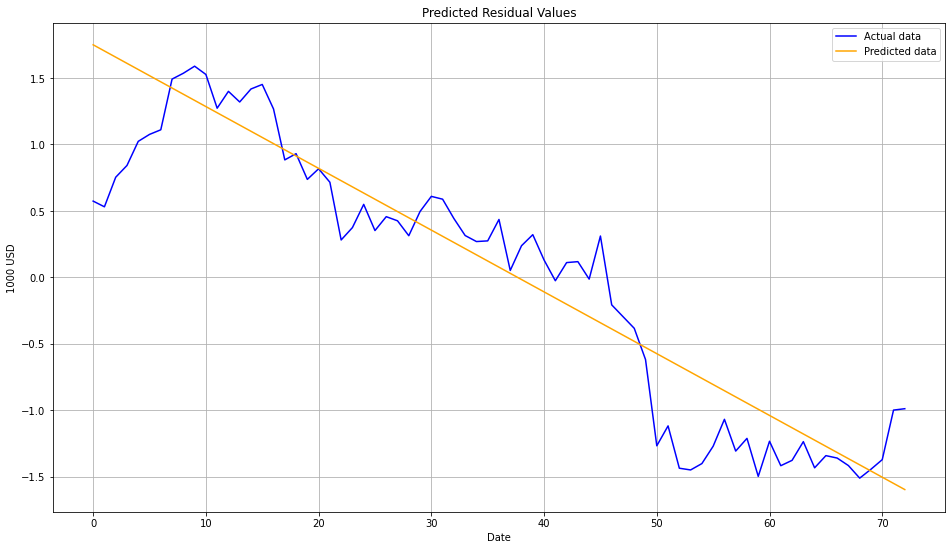

In [21]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Predicted Residual Values")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(column_or_1d(y_scaled), 'blue', label='Actual data')
plt.plot(column_or_1d(pred), 'orange', label='Predicted data')
plt.legend()


# Đưa giá trị về miền giá trị ban đầu

In [22]:
inv_pred = svr_y_sc.inverse_transform(pred.reshape(-1, 1))


In [23]:
df_pred['error_svr'] = inv_pred
df_pred['arima_svr'] = df_pred['arima'] + df_pred['error_svr']
df_pred.tail()

,actual,arima,error,error_svr,arima_svr
2022-05-28,28.6201,42.241,-13.6209,-13.013839,29.227161
2022-05-29,29.0271,42.241,-13.2139,-13.296185,28.944815
2022-05-30,29.4652,42.241,-12.7758,-13.578532,28.662468
2022-05-31,31.7302,42.241,-10.5108,-13.860878,28.380122
2022-06-01,31.7931,42.241,-10.4479,-14.143225,28.097775


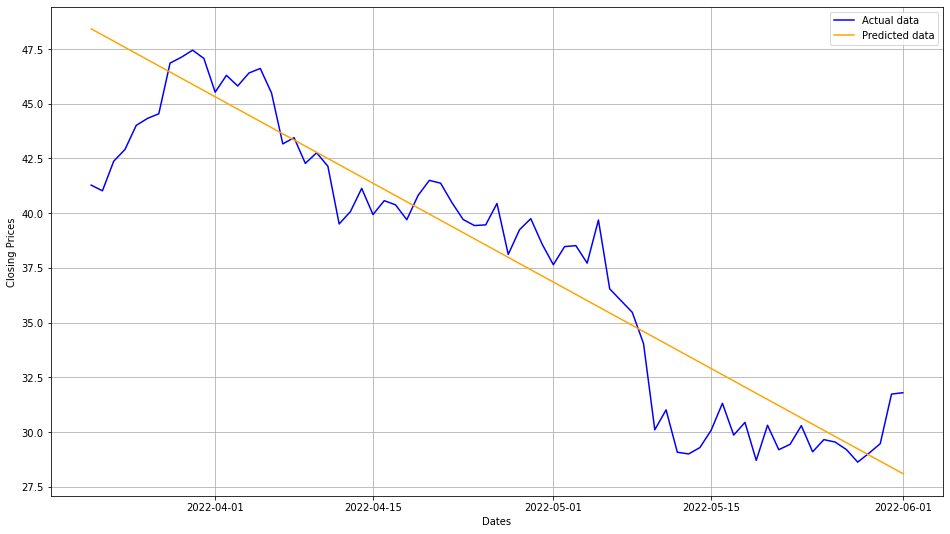

In [24]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_pred['actual'], 'blue', label='Actual data')
plt.plot(df_pred['arima_svr'], 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [25]:
mape = mean_absolute_percentage_error(df_pred['actual'].values, df_pred['arima_svr'].values)
mse = mean_squared_error(df_pred['actual'].values, df_pred['arima_svr'].values)
rmse = np.sqrt(mse)
r2 = r2_score(df_pred['actual'].values, df_pred['arima_svr'].values)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"R-Squared: {r2:.2f}")


RMSE: 2.38
MAPE: 4.94%
R-Squared: 0.85
